<a href="https://colab.research.google.com/github/reemamemon/FEMCode_Tasks/blob/main/EDA_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Summary
**Load and Summarize the Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the Pandas library, which is used for data manipulation and analysis
import pandas as pd

In [4]:
# Load the dataset from the specified file path
file_path = '/content/drive/MyDrive/FEMCodes/dataforeda.csv'
data = pd.read_csv(file_path)  # This reads the CSV file into a DataFrame

In [6]:
# Display the first few rows of the dataset to see what it looks like
print("First few rows of the dataset:")
print(data.head())  # .head() shows the first 5 rows by default

First few rows of the dataset:
   Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1  

In [7]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:", data.shape)  # .shape gives a tuple (rows, columns)


Shape of the dataset: (1303, 12)


In [8]:
# Get information about the dataset, such as column names and data types
print("\nDataset info:")
print(data.info())  # .info() provides a summary of the DataFrame


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


In [9]:
# Get summary statistics of numerical columns
print("\nSummary statistics:")
print(data.describe())  # .describe() shows basic statistics for numerical columns



Summary statistics:
       Unnamed: 0       Inches          Price
count  1303.00000  1303.000000    1303.000000
mean    651.00000    15.017191   59870.042910
std     376.28801     1.426304   37243.201786
min       0.00000    10.100000    9270.720000
25%     325.50000    14.000000   31914.720000
50%     651.00000    15.600000   52054.560000
75%     976.50000    15.600000   79274.246400
max    1302.00000    18.400000  324954.720000


# Step 2: Data Cleaning
**Handle Missing Values and Duplicates**

In [10]:
# Check for missing values in each column
print("Missing values in each column:\n", data.isnull().sum())  # .isnull().sum() counts missing values in each column

Missing values in each column:
 Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [12]:
# Fill missing values with the mean value of the respective *numerical* column
data_numeric = data.select_dtypes(include='number') # Select numerical columns
data[data_numeric.columns] = data[data_numeric.columns].fillna(data_numeric.mean(), inplace=False) # Fill and assign back

In [13]:
# Drop any duplicate rows
data.drop_duplicates(inplace=True)  # .drop_duplicates() removes duplicate rows, inplace=True modifies the DataFrame directly

In [14]:
# Check for any remaining missing values after cleaning
print("\nMissing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


# Step 3: Visualization
**Visualize the Data**

In [15]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

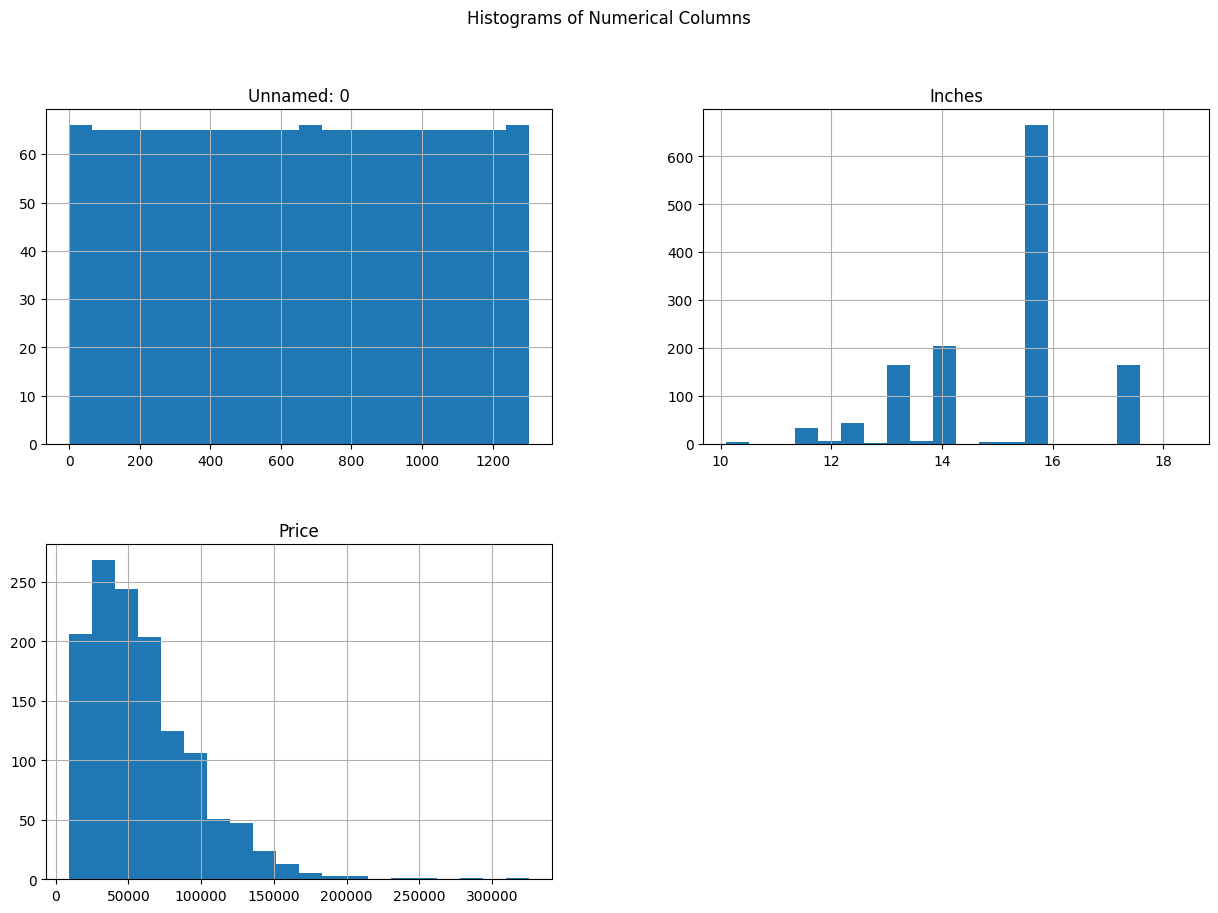

In [16]:
# Create histograms for all numerical columns to see their distributions
data.hist(bins=20, figsize=(15, 10))  # .hist() creates histograms, bins=20 sets the number of bins, figsize sets the size of the plot
plt.suptitle('Histograms of Numerical Columns')  # Title to the plot
plt.show()  # Display the plot

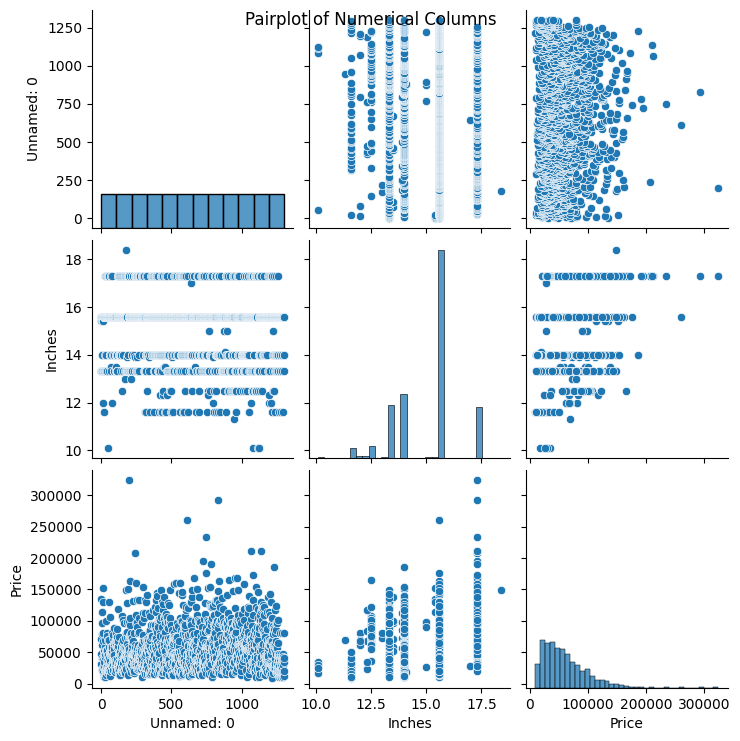

In [17]:
# Create pair plots to visualize relationships between numerical variables
sns.pairplot(data)  # .pairplot() creates scatter plots for all numerical column pairs
plt.suptitle('Pairplot of Numerical Columns')  # Title to the plot
plt.show()  # Display the plot

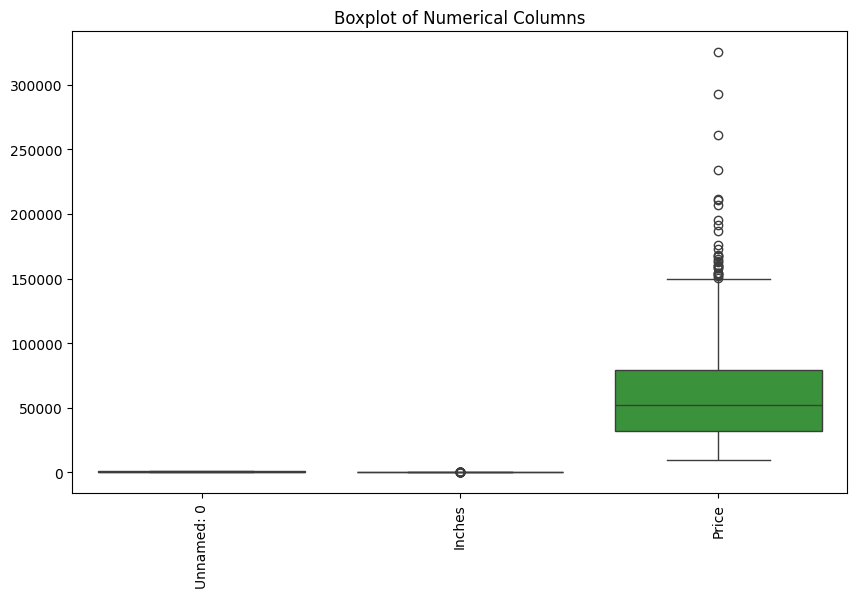

In [18]:
# Create boxplots to detect outliers in numerical columns
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(data=data)  # .boxplot() creates boxplots for numerical columns
plt.title('Boxplot of Numerical Columns')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Step 4: Correlation Analysis
**Analyze Correlations Between Numerical Variables**

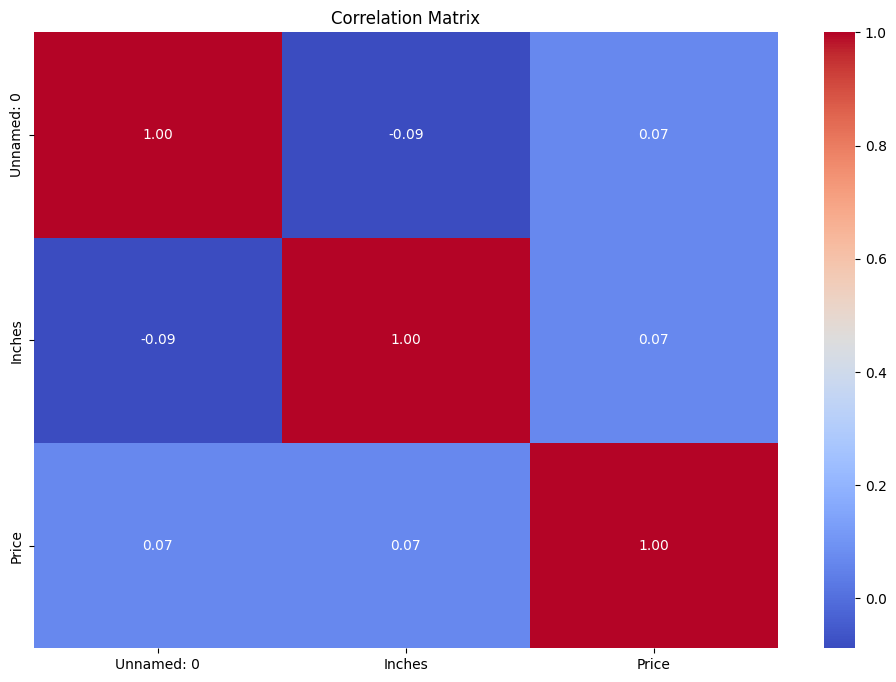

In [23]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # This selects columns with numerical data types

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()  # .corr() computes the correlation matrix

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # .heatmap() creates a heatmap, annot=True shows values, cmap sets the color map, fmt formats the numbers
plt.title('Correlation Matrix')  # Add a title to the plot
plt.show()  # Display the plot

# Step 5: Feature Engineering
**Create New Features**

In [31]:
# Example: Creating a new feature by combining existing features
# Ensure 'feature1' and 'feature2' are columns in your dataset
if 'feature1' in data.columns and 'feature2' in data.columns:
    data['new_feature'] = data['feature1'] * data['feature2']  # Create a new column 'new_feature'
    print("Created new feature 'new_feature' as the product of 'feature1' and 'feature2'")  # Print confirmation
else:
    print("Columns 'feature1' and 'feature2' do not exist in the dataset.")  # Print if columns are missing

Columns 'feature1' and 'feature2' do not exist in the dataset.


# Step 6: Dimensionality Reduction
**Reduce the Number of Features**

In [25]:
# Import libraries for PCA (Principal Component Analysis) and data scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Explained Variance Ratio: [0.36264543 0.35396297]


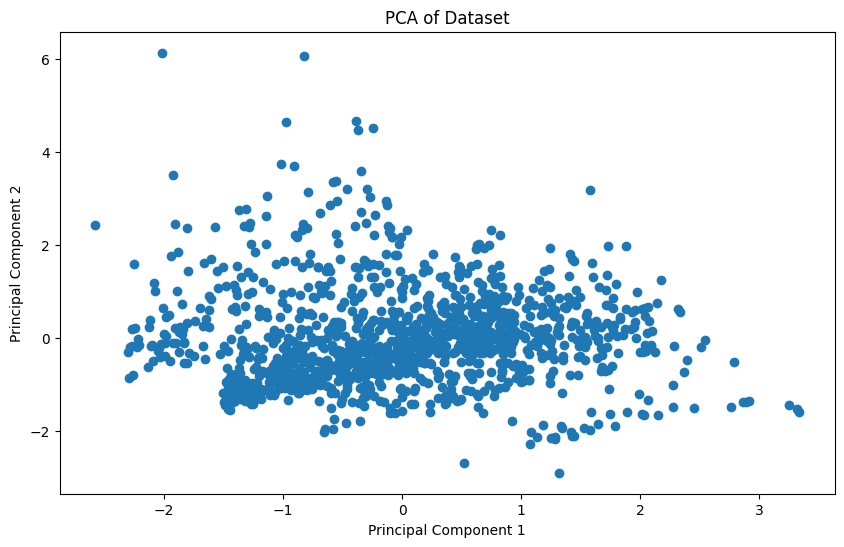

In [26]:
# Standardize the data (mean=0, variance=1) for better PCA performance
scaler = StandardScaler()  # Initialize the scaler
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']))  # Scale numerical columns

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Initialize PCA with the number of components to keep
principal_components = pca.fit_transform(scaled_data)  # Fit PCA and transform the scaled data

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # Create a DataFrame with the principal components

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)  # Print how much variance each principal component explains

# Plot the principal components
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(pca_df['PC1'], pca_df['PC2'])  # Create a scatter plot of the principal components
plt.xlabel('Principal Component 1')  # Label the x-axis
plt.ylabel('Principal Component 2')  # Label the y-axis
plt.title('PCA of Dataset')  # Add a title to the plot
plt.show()  # Display the plot

# Step 7: Feature Extraction
**Select Important Features**

In [27]:
# Import libraries for feature selection
from sklearn.feature_selection import SelectKBest, f_classif

In [30]:
# Assuming 'target' is the column you want to predict
# Ensure 'target' exists in your dataset
if 'target' in data.columns:
    X = data.drop(columns='target')  # Separate features from the target column
    y = data['target']  # Define the target column

    # Apply SelectKBest to select top features
    selector = SelectKBest(score_func=f_classif, k=5)  # Initialize SelectKBest with the number of features to select
    X_new = selector.fit_transform(X, y)  # Fit and transform the data to select top features

    # Get the selected feature indices
    selected_features = selector.get_support(indices=True)  # Get indices of selected features
    selected_feature_names = X.columns[selected_features]  # Get names of selected features
    print("Selected features:", selected_feature_names.tolist())  # Print selected feature names
else:
    print("Column 'target' does not exist in the dataset.")  # Print if target column is missing

Column 'target' does not exist in the dataset.
